In [1]:
!pip install -Uqq fastbook fastai==2.2.5
import fastbook
fastbook.setup_book()





     |████████████████████████████████| 727kB 6.5MB/s 
     |████████████████████████████████| 194kB 8.9MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 1.2MB 12.8MB/s 
     |████████████████████████████████| 61kB 9.4MB/s 
     |████████████████████████████████| 12.8MB 214kB/s 
     |████████████████████████████████| 776.8MB 24kB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [21]:
from fastai.vision.all import *
import numpy as np
import h5py
from PIL import Image
import cv2
import os
import pandas as pd

In [5]:
path = Path('/content/gdrive/MyDrive/Colab/ball/')
filename = '/content/gdrive/MyDrive/Colab/ball/' + r'b-alls-2019.hdf5'

f =  h5py.File(filename, "r")
    # List all groups
# print("Keys: %s" % f.keys())
a_group_key = list(f.keys())[0]

# Get the data
data = list(f[a_group_key])

In [19]:
# obtain positive data
groupp = f[u'positives']
labelsp = groupp[u'labels']
dsetp = groupp[u'data']

# obtain negative data
groupn = f[u'negatives']
labelsn = groupn[u'labels']
dsetn = groupn[u'data']

pos_train = list() 
neg_train = list()
pos_valid = list()
neg_valid = list()
# assign 150 images for training and 50 for validation
for i in range(200):
    imgp = dsetp[i]
    imgn = dsetn[i]
    
    if i<150:
        is_success, im_buf_arr = cv2.imencode('.png', imgp)
        byte_img_pos = im_buf_arr.tobytes()

        is_success_2, im_buf_arr_2 = cv2.imencode('.png', imgn)
        byte_img_neg = im_buf_arr_2.tobytes()

        pos_train.append(byte_img_pos)
        neg_train.append(byte_img_neg)
#         cv2.imwrite('C:/Users/Hady/Documents/Robocup/data/ball/train/pos_images/pos_img'+str(i)+'.png', imgp)
#         cv2.imwrite('C:/Users/Hady/Documents/Robocup/data/ball/train/neg_images/neg_img'+str(i)+'.png', imgn)
    else:
        is_success, im_buf_arr = cv2.imencode('.png', imgp)
        byte_img_pos = im_buf_arr.tobytes()

        is_success_2, im_buf_arr_2 = cv2.imencode('.png', imgn)
        byte_img_neg = im_buf_arr_2.tobytes()

        pos_train.append(byte_img_pos)
        neg_train.append(byte_img_neg)
#         cv2.imwrite('C:/Users/Hady/Documents/Robocup/data/ball/valid/pos_images/pos_img'+str(i-150)+'.png', imgp)    
#         cv2.imwrite('C:/Users/Hady/Documents/Robocup/data/ball/valid/neg_images/neg_img'+str(i-150)+'.png', imgn)


data_set = [pos_train,pos_valid,neg_train,neg_valid]

In [ ]:
df = pd.DataFrame()

In [20]:
path = Path('/content/gdrive/MyDrive/Colab/ball/')
set_seed(42,True)
ball = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(),
                 get_y=parent_label,
                 item_tfms=Resize(640),
                 batch_tfms=[*aug_transforms(size=420, min_scale=0.9)])
dls = ball.dataloaders(data_set,bs=32)


TypeError: ignored

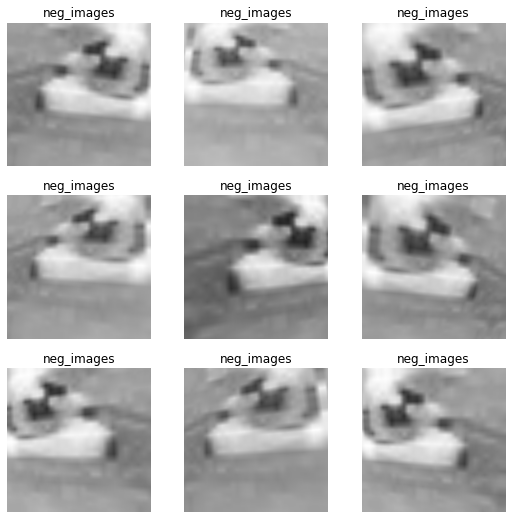

In [ ]:
dls.train.show_batch(unique=True)


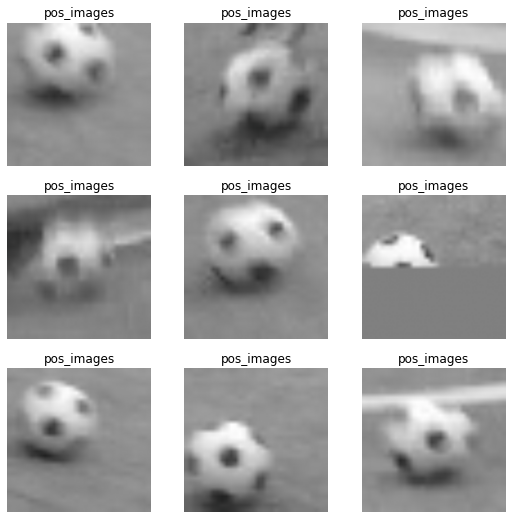

In [ ]:
dls.valid.show_batch(unique=False)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


SuggestedLRs(lr_min=0.014454397559165954, lr_steep=0.0006918309954926372)

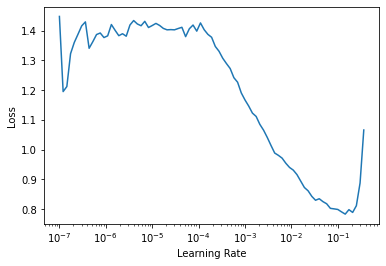

In [ ]:
set_seed(42,True)
dls = ball.dataloaders(path,bs=32)
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.lr_find()

In [ ]:
learn.fine_tune(10, base_lr=1e-3, freeze_epochs=4) 


epoch,train_loss,valid_loss,accuracy,time
0,1.327891,0.752444,0.610000,00:21
1,1.087491,0.494346,0.810000,00:05
2,0.848784,0.461212,0.830000,00:05
3,0.683671,0.438247,0.830000,00:05


epoch,train_loss,valid_loss,accuracy,time
0,0.241961,0.290647,0.890000,00:06
1,0.250105,0.186460,0.930000,00:06
2,0.244043,0.108332,0.960000,00:06
3,0.212146,0.106858,0.960000,00:06
4,0.191517,0.127378,0.960000,00:06
5,0.168199,0.084533,0.960000,00:06
6,0.154876,0.077506,0.970000,00:07
7,0.138529,0.080026,0.980000,00:07
8,0.132179,0.081618,0.980000,00:07
9,0.117237,0.075695,0.980000,00:07


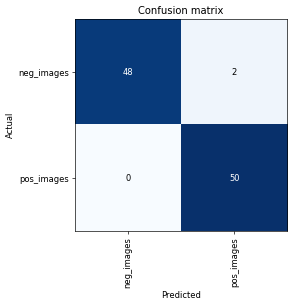

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)